In [1]:
import argparse
import models
import networkx as nx
import pgm_explainer as pe
import pylab as plt
import random
import utils
    
def arg_parse():
    parser = argparse.ArgumentParser(description="Explainer arguments.")

    parser.add_argument(
            "--bmname", dest="bmname", help="Name of the benchmark dataset"
        )
    parser.add_argument("--dataset", dest="dataset", help="Input dataset.")
    parser.add_argument("--ckptdir", dest="ckptdir", help="Model checkpoint directory")
    parser.add_argument(
            "--gpu",
            dest="gpu",
            action="store_const",
            const=True,
            default=False,
            help="whether to use GPU.",
        )
    parser.add_argument(
            "--node-start", dest="node_start", type=int, help="Index of starting node."
        )
    parser.add_argument(
            "--node-end", dest="node_end", type=int, help="Index of ending node."
        )
    parser.add_argument(
            "--num-perturb-samples", dest="num_perturb_samples", type=int, help="Number of perturbed sample using to generate explanations."
        )
    parser.add_argument(
            "--top-node", dest="top_node", type=int, help="Number of nodes in explanation."
        )
    parser.add_argument(
            "--epochs", dest="num_epochs", type=int, help="Number of epochs to train."
        )
    parser.add_argument(
            "--hidden-dim", dest="hidden_dim", type=int, help="Hidden dimension"
        )
    parser.add_argument(
            "--output-dim", dest="output_dim", type=int, help="Output dimension"
        )
    parser.add_argument(
            "--num-gc-layers",
            dest="num_gc_layers",
            type=int,
            help="Number of graph convolution layers before each pooling",
        )
    parser.add_argument(
            "--bn",
            dest="bn",
            action="store_const",
            const=True,
            default=False,
            help="Whether batch normalization is used",
        )
    parser.add_argument("--dropout", dest="dropout", type=float, help="Dropout rate.")
    parser.add_argument(
            "--method", dest="method", type=str, help="Method. Possible values: base, att."
        )
    parser.add_argument(
            "--nobias",
            dest="bias",
            action="store_const",
            const=False,
            default=True,
            help="Whether to add bias. Default to True.",
        )
    
        # Explainer

    parser.set_defaults(
            ckptdir=None,
            dataset="syn1",
            opt="adam",  
            opt_scheduler="none",
            lr=0.1,
            clip=2.0,
            batch_size=20,
            num_epochs=100,
            hidden_dim=20,
            output_dim=20,
            num_gc_layers=3,
            method="base",
            dropout=0.0,
            node_start = None,
            node_end = None,
            num_perturb_samples = 100,
            top_node = None
        )
    
    return parser

In [2]:
prog_args = arg_parse()
args = prog_args.parse_args(['--dataset','syn6','--num-perturb-samples', '1000','--top-node', '7'])

In [3]:
# Load model
A, X = utils.load_XA(args.dataset, datadir="../Generate_XA_Data/XAL")
L = utils.load_labels(args.dataset, datadir="../Generate_XA_Data/XAL")
num_classes = max(L) + 1
input_dim = X.shape[1]
num_nodes = X.shape[0]
ckpt = utils.load_ckpt(args)

print("input dim: ", input_dim, "; num classes: ", num_classes)
    
model = models.GcnEncoderNode(
    input_dim=input_dim,
    hidden_dim=args.hidden_dim,
    embedding_dim=args.output_dim,
    label_dim=num_classes,
    num_layers=args.num_gc_layers,
    bn=args.bn,
    args=args
)
model.load_state_dict(ckpt["model_state"]) 
pred = ckpt["save_data"]["pred"]

loading model
../Train_GNN_model/ckpt/syn6.pth.tar
=> loading checkpoint '../Train_GNN_model/ckpt/syn6.pth.tar'
input dim:  10 ; num classes:  4


In [4]:
random.seed(21)

In [5]:
nodes_to_explain = list(range(300, 330))

In [6]:
explainer = pe.Node_Explainer(model, A, X, pred, 3)

Explainer settings
\ A dim:  (700, 700)
\ X dim:  (700, 10)
\ Number of layers:  3
\ Perturbation mode:  0
\ Print result:  1


Explaining node: 300


/home/lucasresck/GitHub/PGMExplainer/PGM_Node/Explain_GNN/pgm_explainer.py:91: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  X_torch = torch.tensor([self.X], dtype=torch.float)


PGM nodes:  ['302', '553', '303', '304', '301', '550', '300']
PGM edges:  [('302', '300'), ('553', '304'), ('553', '300'), ('304', '301'), ('304', '300'), ('301', '302'), ('301', '300'), ('550', '553'), ('550', '300')]


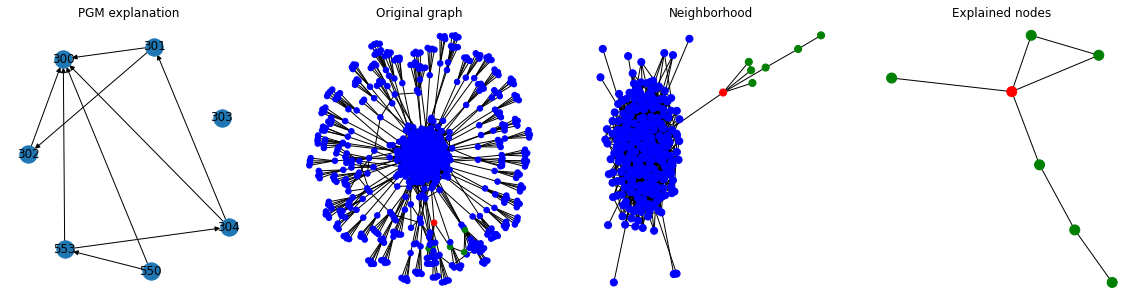

Explaining node: 301
PGM nodes:  ['553', '304', '303', '302', '300', '65', '301']
PGM edges:  [('553', '304'), ('553', '302'), ('553', '301'), ('304', '300'), ('304', '301'), ('303', '301'), ('302', '301'), ('300', '303'), ('65', '301')]


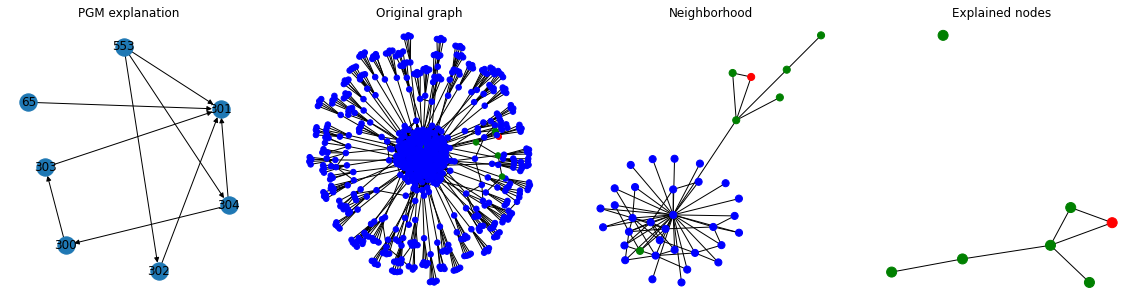

Explaining node: 302
PGM nodes:  ['80', '553', '304', '301', '300', '0', '302']
PGM edges:  [('80', '302'), ('553', '304'), ('553', '302'), ('304', '300'), ('304', '302'), ('301', '553'), ('301', '302'), ('300', '302')]


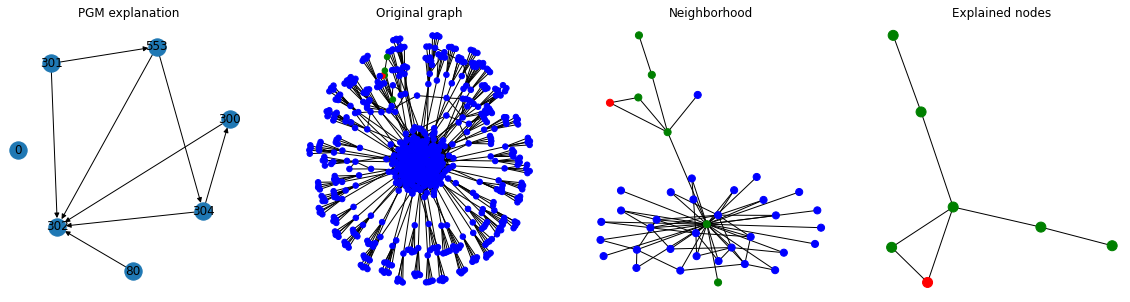

Explaining node: 303
PGM nodes:  ['17', '302', '300', '304', '553', '301', '303']
PGM edges:  [('17', '303'), ('302', '553'), ('302', '303'), ('300', '303'), ('304', '300'), ('304', '303'), ('553', '304'), ('553', '303'), ('301', '302'), ('301', '303')]


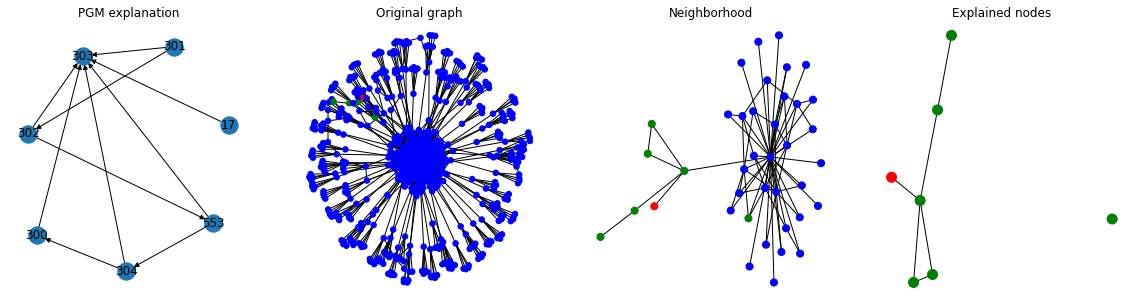

Explaining node: 304
PGM nodes:  ['550', '551', '553', '301', '302', '300', '304']
PGM edges:  [('550', '551'), ('550', '304'), ('551', '553'), ('551', '304'), ('553', '304'), ('302', '301'), ('302', '304'), ('300', '302'), ('300', '304')]


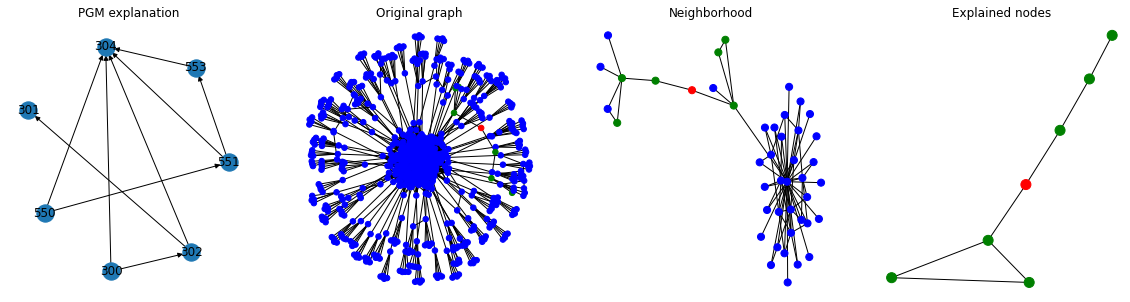

Explaining node: 305
PGM nodes:  ['308', '309', '306', '247', '307', '3', '305']
PGM edges:  [('308', '305'), ('309', '308'), ('309', '305'), ('306', '307'), ('306', '305'), ('247', '305'), ('307', '305'), ('3', '305')]


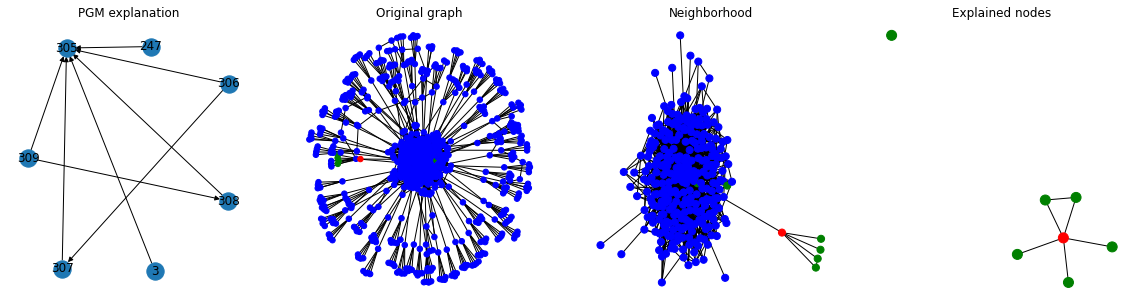

Explaining node: 306
PGM nodes:  ['305', '307', '5', '292', '308', '95', '306']
PGM edges:  [('305', '307'), ('307', '306'), ('5', '306'), ('292', '306'), ('308', '305'), ('308', '306'), ('95', '306')]


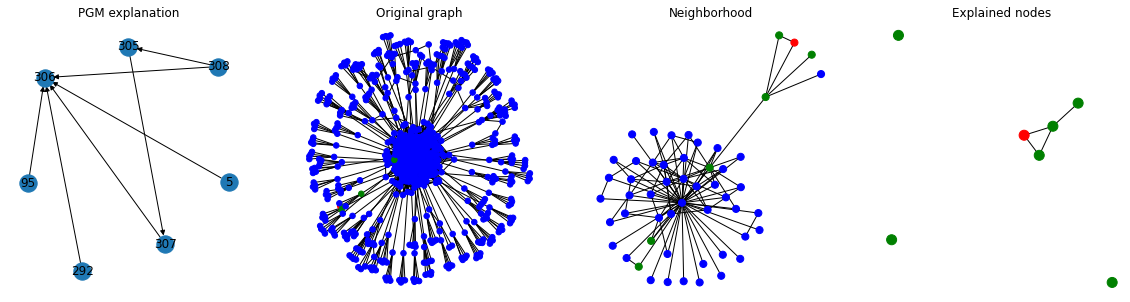

Explaining node: 307
PGM nodes:  ['14', '305', '308', '309', '306', '238', '307']
PGM edges:  [('14', '307'), ('305', '307'), ('308', '309'), ('308', '305'), ('308', '307'), ('309', '307'), ('306', '307'), ('238', '307')]


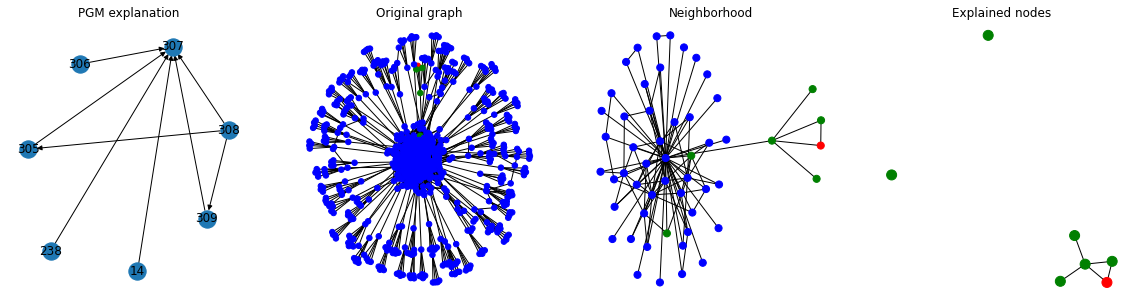

Explaining node: 308
PGM nodes:  ['80', '309', '307', '306', '305', '292', '308']
PGM edges:  [('80', '308'), ('309', '308'), ('307', '305'), ('307', '308'), ('306', '307'), ('306', '308'), ('305', '309'), ('305', '308')]


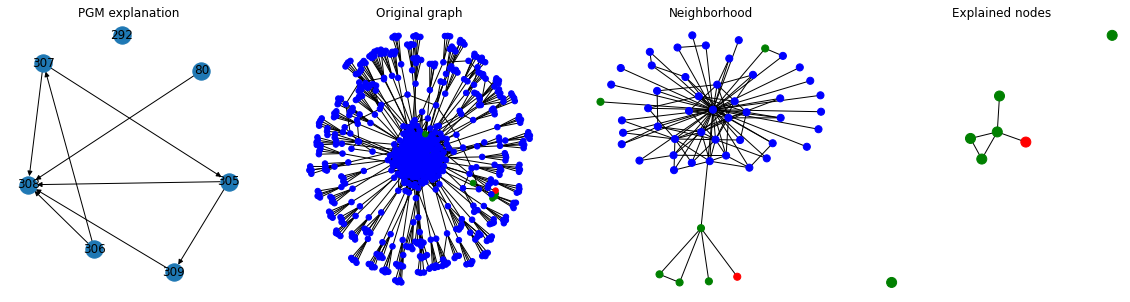

Explaining node: 309
PGM nodes:  ['34', '308', '306', '305', '3', '292', '309']
PGM edges:  [('34', '309'), ('308', '305'), ('308', '309'), ('306', '309'), ('305', '306'), ('305', '309')]


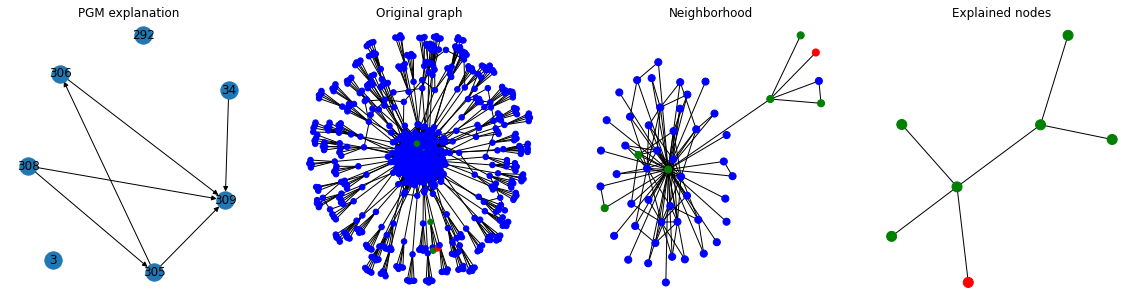

Explaining node: 310
PGM nodes:  ['312', '313', '314', '311', '221', '195', '310']
PGM edges:  [('312', '311'), ('312', '310'), ('313', '314'), ('313', '310'), ('314', '310'), ('311', '310'), ('221', '310'), ('195', '310')]


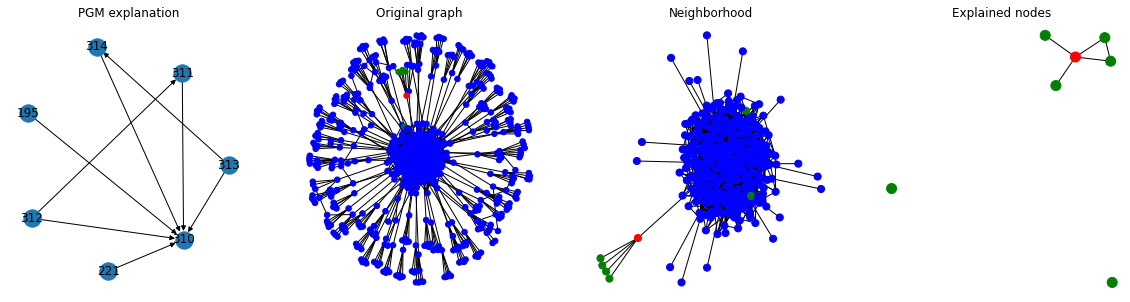

Explaining node: 311
PGM nodes:  ['312', '310', '314', '313', '6', '19', '311']
PGM edges:  [('312', '311'), ('310', '312'), ('310', '311'), ('314', '310'), ('314', '311'), ('313', '314'), ('313', '311'), ('6', '311'), ('19', '311')]


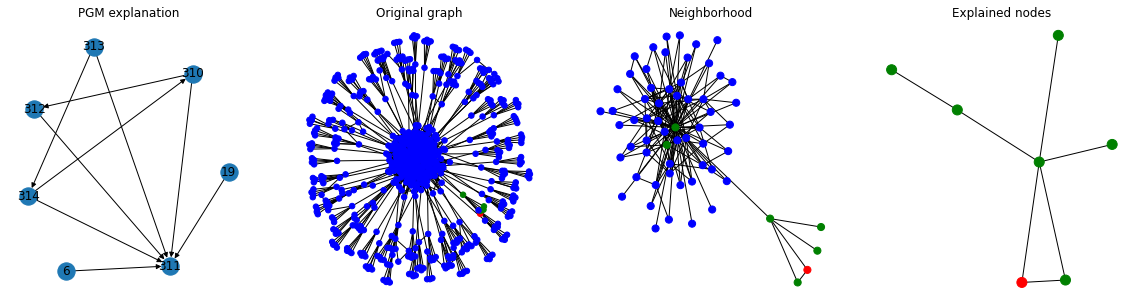

Explaining node: 312
PGM nodes:  ['310', '69', '313', '38', '314', '311', '312']
PGM edges:  [('69', '312'), ('313', '314'), ('313', '312'), ('38', '312'), ('314', '310'), ('314', '312'), ('311', '312')]


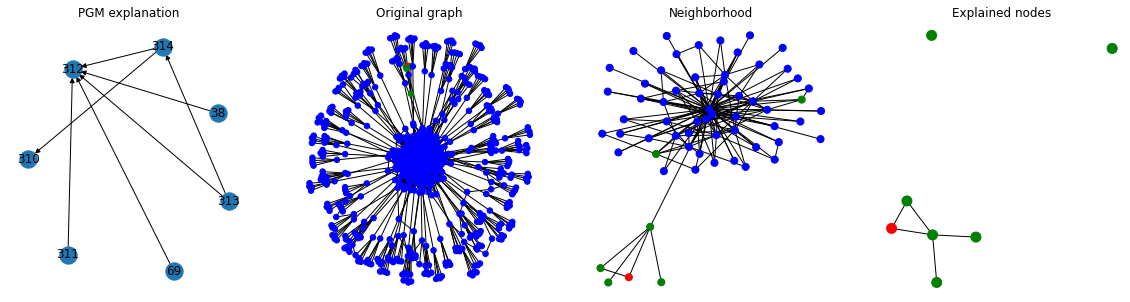

Explaining node: 313
PGM nodes:  ['310', '314', '311', '139', '14', '6', '313']
PGM edges:  [('310', '314'), ('310', '311'), ('310', '313'), ('314', '313'), ('311', '313'), ('14', '313')]


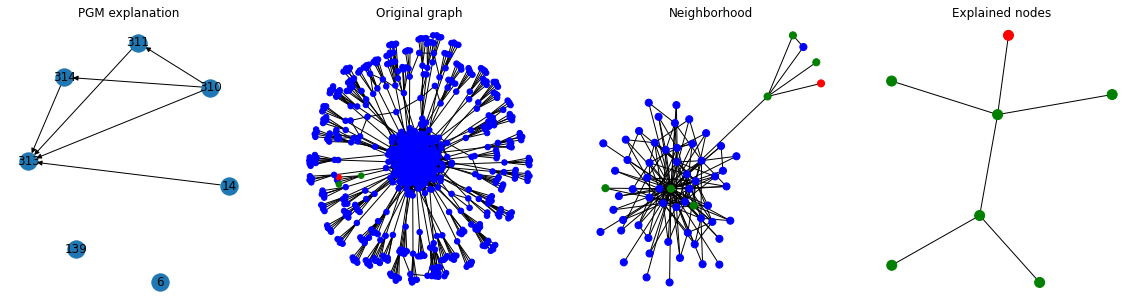

Explaining node: 314
PGM nodes:  ['311', '38', '313', '312', '310', '93', '314']
PGM edges:  [('311', '314'), ('313', '314'), ('312', '311'), ('312', '314'), ('310', '313'), ('310', '312'), ('310', '314')]


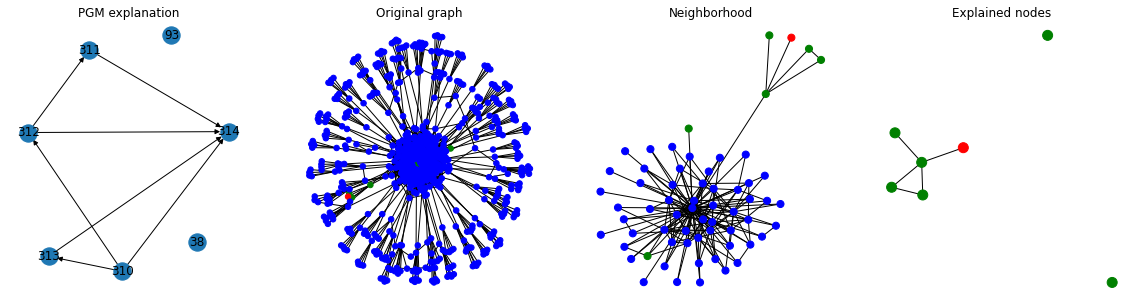

Explaining node: 315
PGM nodes:  ['319', '318', '316', '317', '206', '175', '315']
PGM edges:  [('319', '315'), ('318', '319'), ('318', '315'), ('316', '315'), ('317', '316'), ('317', '315'), ('206', '315'), ('175', '315')]


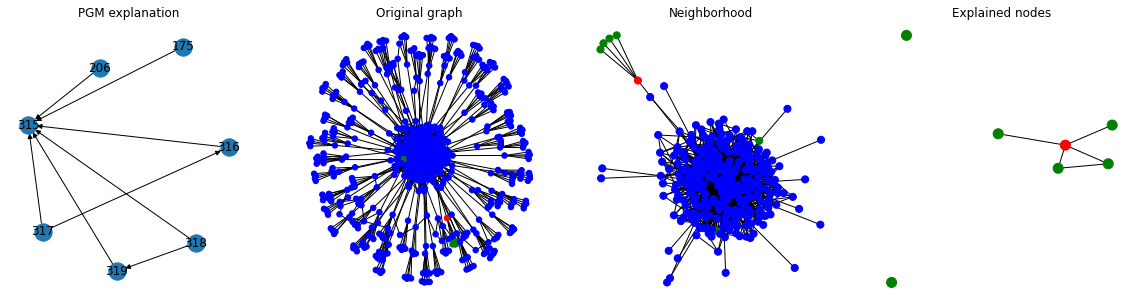

Explaining node: 316
PGM nodes:  ['272', '5', '318', '317', '319', '315', '316']
PGM edges:  [('272', '316'), ('5', '316'), ('318', '316'), ('317', '316'), ('319', '318'), ('319', '315'), ('319', '316'), ('315', '317'), ('315', '316')]


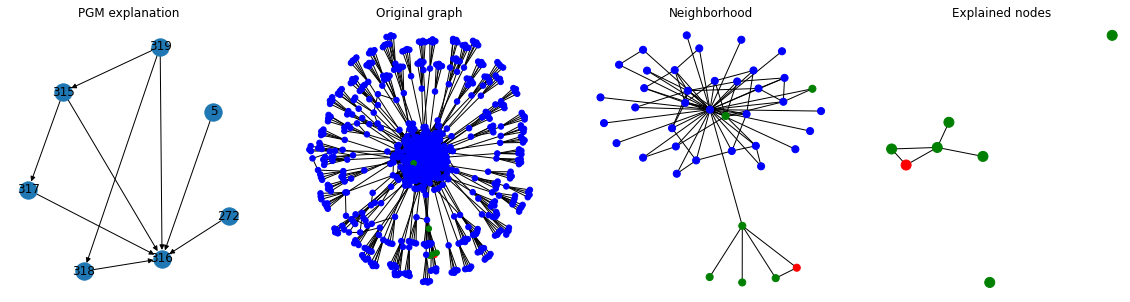

Explaining node: 317
PGM nodes:  ['162', '316', '318', '319', '315', '241', '317']
PGM edges:  [('162', '317'), ('316', '317'), ('318', '319'), ('318', '315'), ('318', '317'), ('319', '317'), ('315', '317'), ('241', '317')]


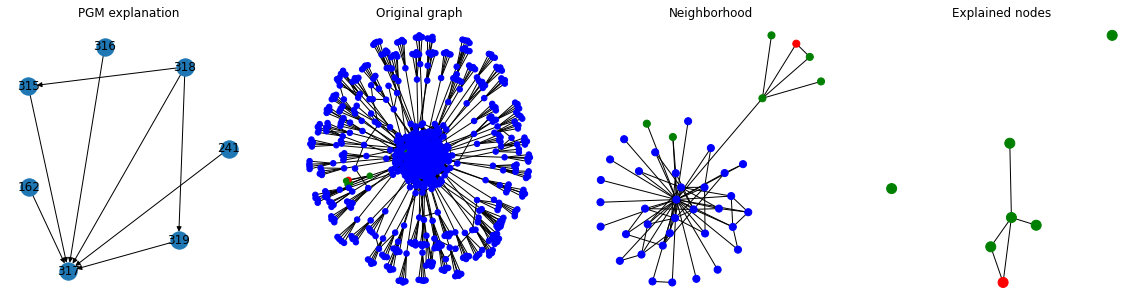

Explaining node: 318
PGM nodes:  ['315', '316', '319', '317', '58', '162', '318']
PGM edges:  [('315', '319'), ('315', '318'), ('316', '318'), ('319', '318'), ('317', '316'), ('317', '318'), ('58', '318')]


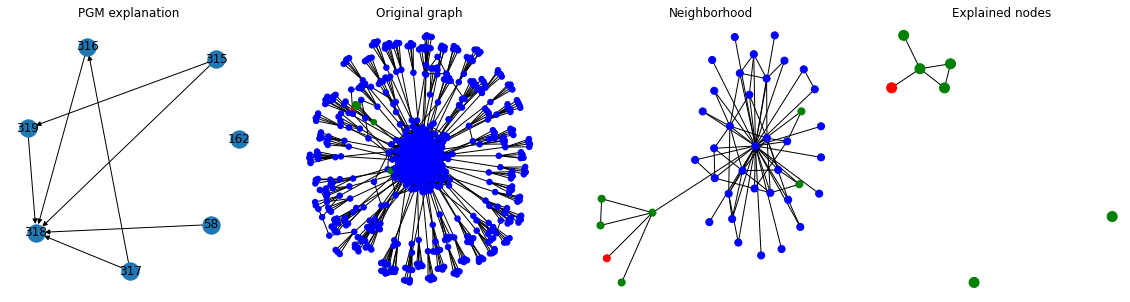

Explaining node: 319
PGM nodes:  ['216', '315', '318', '317', '316', '272', '319']
PGM edges:  [('216', '319'), ('315', '319'), ('318', '315'), ('318', '319'), ('317', '319'), ('316', '317'), ('316', '319')]


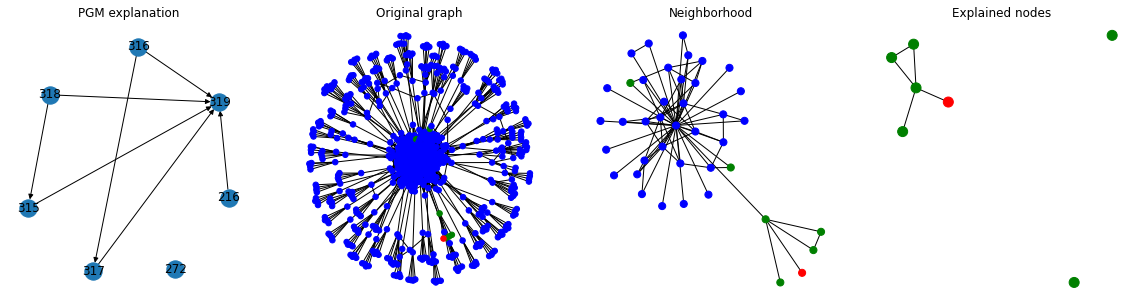

Explaining node: 320
PGM nodes:  ['321', '620', '624', '322', '324', '323', '320']
PGM edges:  [('321', '320'), ('620', '624'), ('620', '320'), ('624', '323'), ('624', '320'), ('322', '321'), ('322', '320'), ('323', '324'), ('323', '320')]


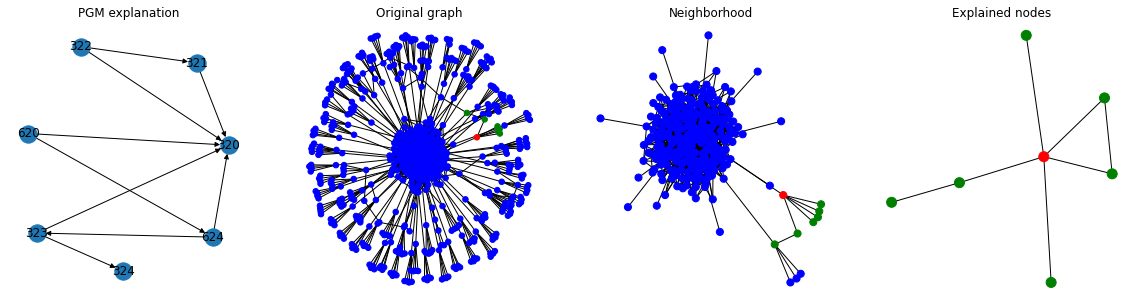

Explaining node: 321
PGM nodes:  ['322', '320', '620', '11', '624', '159', '321']
PGM edges:  [('322', '321'), ('320', '624'), ('320', '321'), ('620', '320'), ('620', '624'), ('620', '321'), ('624', '321'), ('159', '321')]


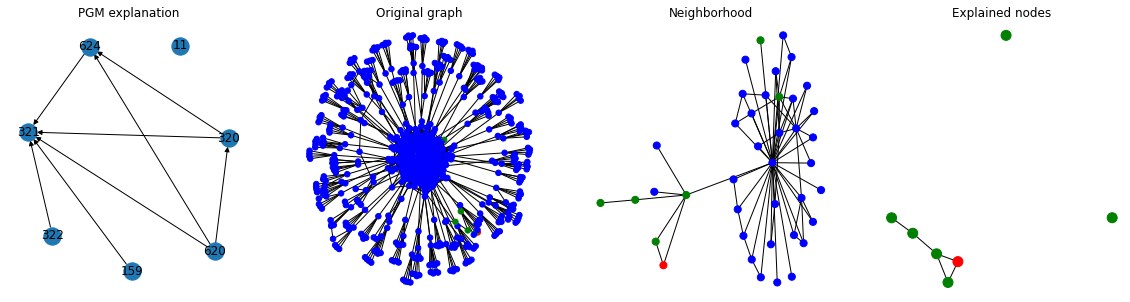

Explaining node: 322
PGM nodes:  ['321', '620', '110', '320', '624', '323', '322']
PGM edges:  [('321', '322'), ('620', '624'), ('620', '322'), ('320', '620'), ('320', '624'), ('320', '322'), ('624', '322'), ('323', '320'), ('323', '322')]


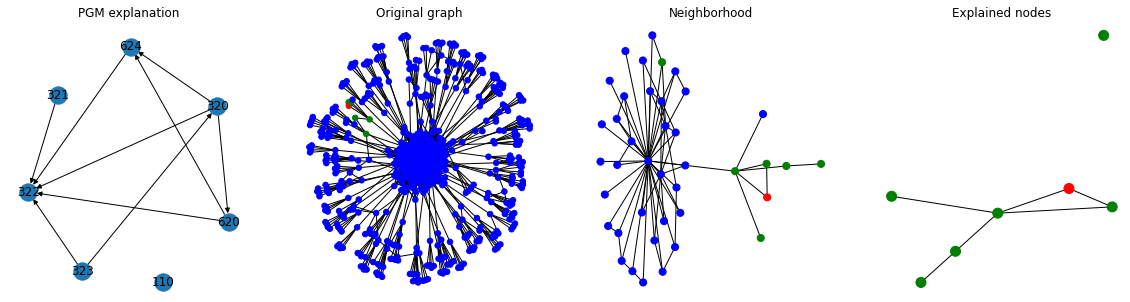

Explaining node: 323
PGM nodes:  ['320', '624', '324', '136', '322', '0', '323']
PGM edges:  [('320', '624'), ('320', '323'), ('624', '323'), ('324', '320'), ('136', '323'), ('322', '323')]


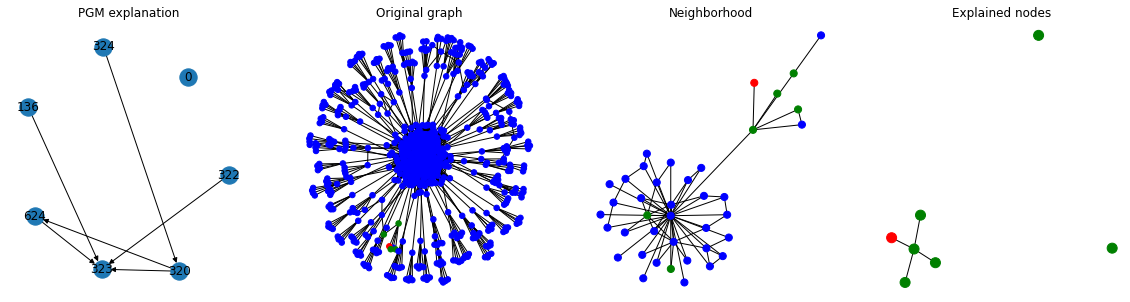

Explaining node: 324
PGM nodes:  ['323', '320', '322', '624', '321', '12', '324']
PGM edges:  [('323', '320'), ('323', '324'), ('320', '624'), ('320', '322'), ('322', '321'), ('322', '324'), ('624', '324'), ('321', '324')]


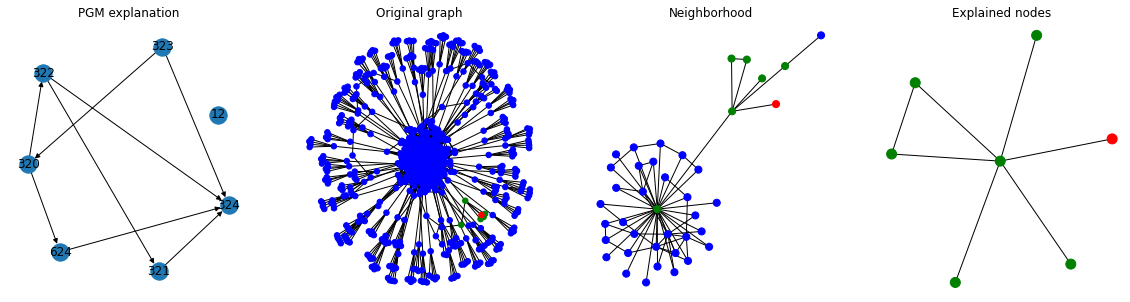

Explaining node: 325
PGM nodes:  ['328', '329', '326', '263', '213', '327', '325']
PGM edges:  [('328', '329'), ('328', '325'), ('329', '325'), ('326', '325'), ('263', '325'), ('213', '325'), ('327', '326'), ('327', '325')]


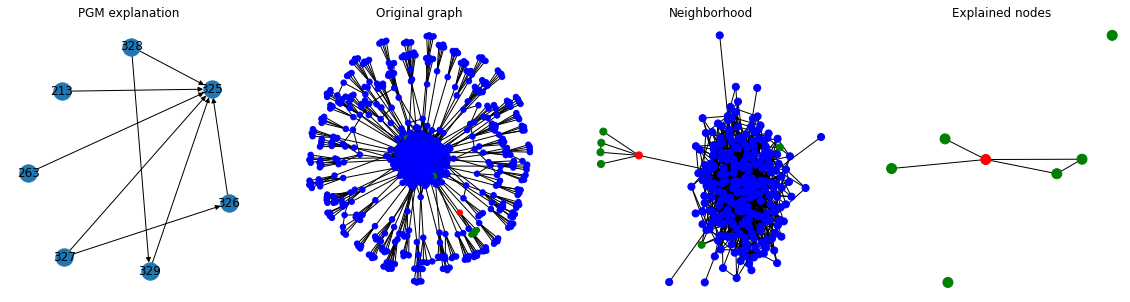

Explaining node: 326
PGM nodes:  ['325', '15', '328', '327', '329', '74', '326']
PGM edges:  [('325', '327'), ('325', '326'), ('15', '326'), ('328', '329'), ('328', '325'), ('328', '326'), ('327', '326'), ('329', '326'), ('74', '326')]


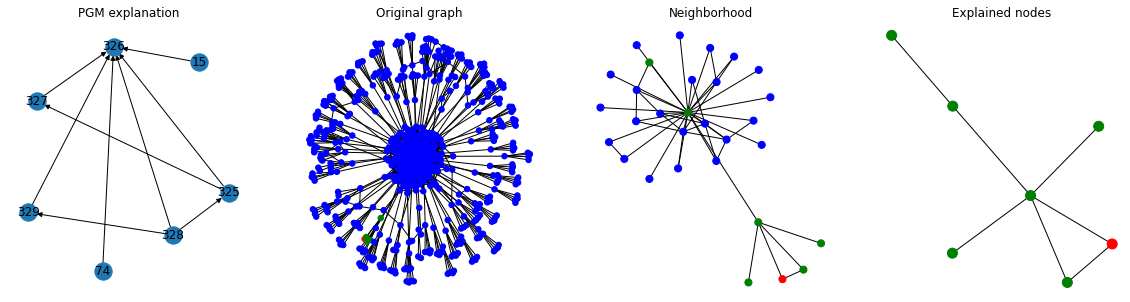

Explaining node: 327
PGM nodes:  ['325', '326', '328', '223', '329', '262', '327']
PGM edges:  [('325', '327'), ('326', '327'), ('328', '329'), ('328', '325'), ('328', '327'), ('223', '327'), ('329', '327'), ('262', '327')]


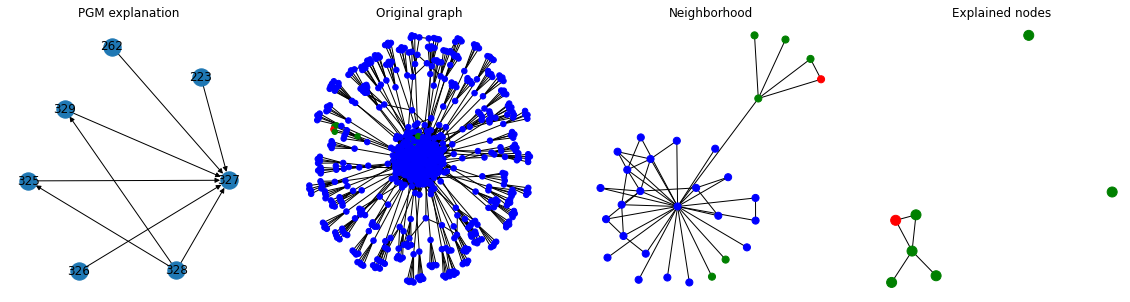

Explaining node: 328
PGM nodes:  ['325', '220', '327', '329', '44', '15', '328']
PGM edges:  [('325', '327'), ('325', '328'), ('327', '328'), ('329', '325'), ('329', '328'), ('15', '328')]


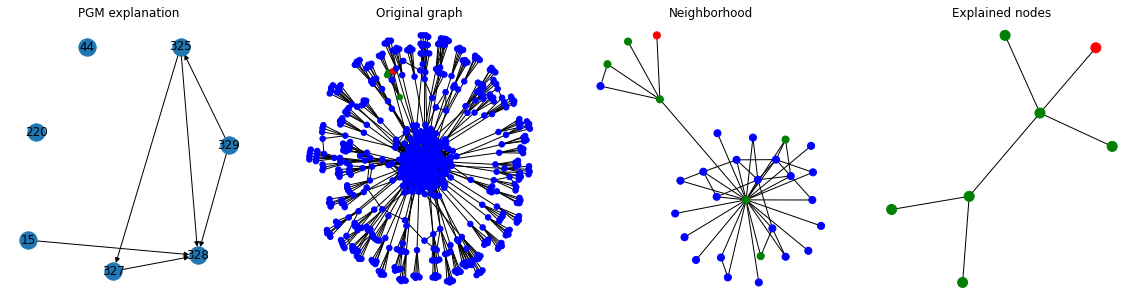

Explaining node: 329
PGM nodes:  ['327', '328', '326', '15', '325', '220', '329']
PGM edges:  [('327', '326'), ('327', '329'), ('328', '325'), ('328', '329'), ('326', '329'), ('15', '329'), ('325', '327'), ('325', '329')]


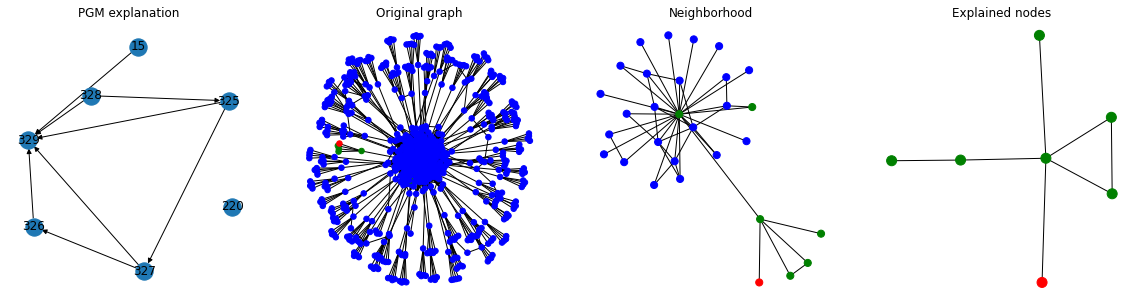

In [7]:
for target in nodes_to_explain:
    subnodes, data, stats = explainer.explain(target, num_samples=1000, top_node=7, pred_threshold=0.2)
    pgm_explanation = explainer.pgm_generate(target, data, stats, subnodes)
    print("PGM nodes: ", pgm_explanation.nodes())
    print("PGM edges: ", pgm_explanation.edges())

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    nx.draw(pgm_explanation, with_labels=True, ax=axes[0])
    axes[0].set_title("PGM explanation")

    G = nx.from_numpy_array(A)
    neighborhood = list(nx.single_source_shortest_path_length(G, target, cutoff=3).keys())
    H = nx.subgraph_view(G, filter_node=lambda x: x in neighborhood)
    I = nx.subgraph_view(G, filter_node=lambda x: str(x) in list(pgm_explanation))

    def color_map_func(graph):
        color_map = []
        for node in graph:
            if node == target:
                color_map.append('red')
            elif str(node) in list(pgm_explanation):
                color_map.append('green')
            else:
                color_map.append('blue')
        return color_map

    nx.draw(G, node_size=30, node_color=color_map_func(G), ax=axes[1])
    axes[1].set_title('Original graph')

    nx.draw(H, node_size=50, node_color=color_map_func(H), ax=axes[2])
    axes[2].set_title('Neighborhood')

    nx.draw(I, node_size=100, node_color=color_map_func(I), ax=axes[3])
    axes[3].set_title('Explained nodes')

    plt.show()